In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rutinas_AutoInt as ru

from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp, quad

In [3]:
import plt_conf as conf
conf.general()  # cargando configuración general

In [4]:
# cargando datos n=0

##### Lamb=0 #####
radSigmMasan0 = np.load('Datos/fondo_n0/radSigmMasa_n0.npz', allow_pickle=True)
Sig0R99M99EnergyTn0 = np.load('Datos/fondo_n0/Sig0R99M99EnergyT_n0.npz', allow_pickle=True)

##### Lamb=1 #####
radSigmMasaNP1n0 = np.load('Datos/fondo_n0/radSigmMasa_n0_Pos.npz', allow_pickle=True)
Sig0R99M99EnergyTNP1n0 = np.load('Datos/fondo_n0/Sig0R99M99EnergyT_n0_Pos.npz', allow_pickle=True)

##### Lamb=-1 #####
radSigmMasaNM1n0 = np.load('Datos/fondo_n0/radSigmMasa_n0_Neg.npz', allow_pickle=True)
Sig0R99M99EnergyTNM1n0 = np.load('Datos/fondo_n0/Sig0R99M99EnergyT_n0_Neg.npz', allow_pickle=True)

#### completando
radSigmMasaNM1Cn0 = np.load('Datos/fondo_n0/radSigmMasan0M1.npz', allow_pickle=True)
Sig0R99M99EnergyTNM1Cn0 = np.load('Datos/fondo_n0/Sig0R99M99EnergyTn0M1.npz', allow_pickle=True)
radSigmMasaNCn0 = np.load('Datos/fondo_n0/radSigmMasan0.npz', allow_pickle=True)
Sig0R99M99EnergyTNCn0 = np.load('Datos/fondo_n0/Sig0R99M99EnergyTn0.npz', allow_pickle=True)
#radSigmMasaNP1Cn0 = np.load('Datos/fondo_n0/radSigmMasa_n0_Pos_ext.npz', allow_pickle=True)
#Sig0R99M99EnergyTNP1Cn0 = np.load('Datos/fondo_n0/Sig0R99M99EnergyT_n0_Pos_ext.npz', allow_pickle=True)

# cargando datos n=1

##### Lamb=0 #####
radSigmMasan1 = np.load('Datos/fondo_n1/radSigmMasa_n1.npz', allow_pickle=True)
Sig0R99M99EnergyTn1 = np.load('Datos/fondo_n1/Sig0R99M99EnergyT_n1.npz', allow_pickle=True)

##### Lamb=1 #####
radSigmMasaNP1n1 = np.load('Datos/fondo_n1/radSigmMasa_n1_Pos.npz', allow_pickle=True)
Sig0R99M99EnergyTNP1n1 = np.load('Datos/fondo_n1/Sig0R99M99EnergyT_n1_Pos.npz', allow_pickle=True)

##### Lamb=-1 #####
radSigmMasaNM1n1 = np.load('Datos/fondo_n1/radSigmMasa_n1_Neg.npz', allow_pickle=True)
Sig0R99M99EnergyTNM1n1 = np.load('Datos/fondo_n1/Sig0R99M99EnergyT_n1_Neg.npz', allow_pickle=True)

radSigmMasaNM12n1 = np.load('Datos/fondo_n1/radSigmMasa_Exn1M.npz', allow_pickle=True)
Sig0R99M99EnergyTNM12n1 = np.load('Datos/fondo_n1/Sig0R99M99EnergyT_Exn1M.npz', allow_pickle=True)

# cargando datos n=2
radSigmMasa2n2 = np.load('Datos/fondo_n2/radSigmMasa_n2.npz', allow_pickle=True)
Sig0R99M99EnergyT2n2 = np.load('Datos/fondo_n2/Sig0R99M99EnergyT_n2.npz', allow_pickle=True)

# Lamb=1 #####
radSigmMasaP2n2 = np.load('Datos/fondo_n2/radSigmMasa_n2_Pos.npz', allow_pickle=True)
Sig0R99M99EnergyTP2n2 = np.load('Datos/fondo_n2/Sig0R99M99EnergyT_n2_Pos.npz', allow_pickle=True)

# Lamb=-1 #####
radSigmMasaN2n2 = np.load('Datos/fondo_n2/radSigmMasa_n2_Neg.npz', allow_pickle=True)
Sig0R99M99EnergyTN2n2 = np.load('Datos/fondo_n2/Sig0R99M99EnergyT_n2_Neg.npz', allow_pickle=True)

In [5]:
#  datos n=0

##### Lamb=0 #####
Sig0R99M99Energyn0 = Sig0R99M99EnergyTn0['arr_0']
radSigmMasan0= radSigmMasan0['arr_0']
# completando
Sig0R99M99EnergyCn0 = Sig0R99M99EnergyTNCn0['arr_0']
radSigmMasaCn0 = radSigmMasaNCn0['arr_0']

##### Lamb=1 #####
Sig0R99M99EnergyP1n0 = Sig0R99M99EnergyTNP1n0['arr_0']
radSigmMasaP1n0 = radSigmMasaNP1n0['arr_0']
# completando
#Sig0R99M99EnergyP1Cn0 = Sig0R99M99EnergyTNP1Cn0['arr_0']
#radSigmMasaP1Cn0 = radSigmMasaNP1Cn0['arr_0']

##### Lamb=-1 #####
Sig0R99M99EnergyM1n0 = Sig0R99M99EnergyTNM1n0['arr_0']
radSigmMasaM1n0 = radSigmMasaNM1n0['arr_0']
# completando
Sig0R99M99EnergyM1Cn0 = Sig0R99M99EnergyTNM1Cn0['arr_0']
radSigmMasaM1Cn0 = radSigmMasaNM1Cn0['arr_0']

#  datos n=1
##### Lamb=0 #####
Sig0R99M99Energyn1 = Sig0R99M99EnergyTn1['arr_0']
radSigmMasan1 = radSigmMasan1['arr_0']

##### Lamb=1 #####
Sig0R99M99EnergyP1n1 = Sig0R99M99EnergyTNP1n1['arr_0']
radSigmMasaP1n1 = radSigmMasaNP1n1['arr_0']

##### Lamb=-1 #####
Sig0R99M99EnergyM1n1 = Sig0R99M99EnergyTNM1n1['arr_0']
radSigmMasaM1n1 = radSigmMasaNM1n1['arr_0']

Sig0R99M99EnergyM12n1 = Sig0R99M99EnergyTNM12n1['arr_0']
radSigmMasaM12n1 = radSigmMasaNM12n1['arr_0']

#  datos n=2
##### Lamb=0 #####
Sig0R99M99Energy2n2 = Sig0R99M99EnergyT2n2['arr_0']
radSigmMasa2n2 = radSigmMasa2n2['arr_0']

##### Lamb=1 #####
Sig0R99M99EnergyP2n2 = Sig0R99M99EnergyTP2n2['arr_0']
radSigmMasaP2n2 = radSigmMasaP2n2['arr_0']

##### Lamb=-1 #####
Sig0R99M99EnergyM2n2 = Sig0R99M99EnergyTN2n2['arr_0']
radSigmMasaM2n2 = radSigmMasaN2n2['arr_0']

# filtro
#Sig0R99M99EnergyM2n2[25, 2] = 1e03
#Sig0R99M99EnergyM2n2[40, 2] = 1e03
#Sig0R99M99EnergyM2n2[41, 2] = 1e03
#Sig0R99M99EnergyM2n2[42, 2] = 1e03
#ind = Sig0R99M99EnergyM2n2[:, 2]<1e02
#Sig0R99M99EnergyM2n2 = Sig0R99M99EnergyM2n2[ind, :]

#radSigmMasaM2n2 = radSigmMasaM2n2[ind]

In [6]:
#############
### n = 0
###########
# Lambda = 0
Lamb = 0  # autointeraccion
L0dataEnfM1n0, L0dataTfM1n0, L0dataFfM1n0 = [], [], []
for i in radSigmMasan0:
    r, sig, _ = i
   
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
    L0dataEnfM1n0.append([sig[0], Enf])
    L0dataTfM1n0.append([sig[0], Tfval])
    L0dataFfM1n0.append([sig[0], Ffval])

#for i in radSigmMasaCn0[1:]:
#    r, sig, _ = i
   
#    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
#    L0dataEnfM1n0.append([sig[0], Enf])
#    L0dataTfM1n0.append([sig[0], Tfval])
#    L0dataFfM1n0.append([sig[0], Ffval])

L0dataEnfM1n0 = np.array(L0dataEnfM1n0)
L0dataTfM1n0 = np.array(L0dataTfM1n0)
L0dataFfM1n0 = np.array(L0dataFfM1n0)

# Lambda = -1
Lamb = -1  # autointeraccion
LM1dataEnfM1n0, LM1dataTfM1n0, LM1dataFfM1n0 = [], [], []
for i in radSigmMasaM1n0[:-1]:
    r, sig, _ = i
   
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
    LM1dataEnfM1n0.append([sig[0], Enf])
    LM1dataTfM1n0.append([sig[0], Tfval])
    LM1dataFfM1n0.append([sig[0], Ffval])

for i in radSigmMasaM1Cn0[1:]:
    r, sig, _ = i
   
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
    LM1dataEnfM1n0.append([sig[0], Enf])
    LM1dataTfM1n0.append([sig[0], Tfval])
    LM1dataFfM1n0.append([sig[0], Ffval])

LM1dataEnfM1n0 = np.array(LM1dataEnfM1n0)
LM1dataTfM1n0 = np.array(LM1dataTfM1n0)
LM1dataFfM1n0 = np.array(LM1dataFfM1n0)

# Lambda = 1
Lamb = 1  # autointeraccion
LP1dataEnfM1n0, LP1dataTfM1n0, LP1dataFfM1n0 = [], [], []
for i in radSigmMasaP1n0:
    r, sig, _ = i
   
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
    LP1dataEnfM1n0.append([sig[0], Enf])
    LP1dataTfM1n0.append([sig[0], Tfval])
    LP1dataFfM1n0.append([sig[0], Ffval])
    
#for i in radSigmMasaP1Cn0:
#    r, sig, _ = i
   
#    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
#    LP1dataEnfM1n0.append([sig[0], Enf])
#    LP1dataTfM1n0.append([sig[0], Tfval])
#    LP1dataFfM1n0.append([sig[0], Ffval])

LP1dataEnfM1n0 = np.array(LP1dataEnfM1n0)
LP1dataTfM1n0 = np.array(LP1dataTfM1n0)
LP1dataFfM1n0 = np.array(LP1dataFfM1n0)

#############
### n = 1
###########
# Lambda = 0
Lamb = 0  # autointeraccion
L0dataEnfM1n1, L0dataTfM1n1, L0dataFfM1n1 = [], [], []
for i in radSigmMasan1:
    r, sig, _ = i
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)  
    L0dataEnfM1n1.append([sig[0], Enf])
    L0dataTfM1n1.append([sig[0], Tfval])
    L0dataFfM1n1.append([sig[0], Ffval])

L0dataEnfM1n1 = np.array(L0dataEnfM1n1)
L0dataTfM1n1 = np.array(L0dataTfM1n1)
L0dataFfM1n1 = np.array(L0dataFfM1n1)

# Lambda = -1
Lamb = -1  # autointeraccion
LM1dataEnfM1n1, LM1dataTfM1n1, LM1dataFfM1n1 = [], [], []
for i in radSigmMasaM1n1[:-2]:
    r, sig, _ = i
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)  
    LM1dataEnfM1n1.append([sig[0], Enf])
    LM1dataTfM1n1.append([sig[0], Tfval])
    LM1dataFfM1n1.append([sig[0], Ffval])

for i in radSigmMasaM12n1:
    r, sig, _ = i
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)  
    LM1dataEnfM1n1.append([sig[0], Enf])
    LM1dataTfM1n1.append([sig[0], Tfval])
    LM1dataFfM1n1.append([sig[0], Ffval])

LM1dataEnfM1n1 = np.array(LM1dataEnfM1n1)
LM1dataTfM1n1 = np.array(LM1dataTfM1n1)
LM1dataFfM1n1 = np.array(LM1dataFfM1n1)

# Lambda = 1
Lamb = 1  # autointeraccion
LP1dataEnfM1n1, LP1dataTfM1n1, LP1dataFfM1n1 = [], [], []
for i in radSigmMasaP1n1: #radSigmMasa, radSigmMasaM1
    r, sig, _ = i
   
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
    LP1dataEnfM1n1.append([sig[0], Enf])
    LP1dataTfM1n1.append([sig[0], Tfval])
    LP1dataFfM1n1.append([sig[0], Ffval])

LP1dataEnfM1n1 = np.array(LP1dataEnfM1n1)
LP1dataTfM1n1 = np.array(LP1dataTfM1n1)
LP1dataFfM1n1 = np.array(LP1dataFfM1n1)

#############
### n = 2
###########
# Lambda = 0
Lamb = 0  # autointeraccion
L0dataEnfM1n2, L0dataTfM1n2, L0dataFfM1n2 = [], [], []
for i in radSigmMasa2n2: #radSigmMasa, radSigmMasaM1
    r, sig, _ = i
   
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
    L0dataEnfM1n2.append([sig[0], Enf])
    L0dataTfM1n2.append([sig[0], Tfval])
    L0dataFfM1n2.append([sig[0], Ffval])

L0dataEnfM1n2 = np.array(L0dataEnfM1n2)
L0dataTfM1n2 = np.array(L0dataTfM1n2)
L0dataFfM1n2 = np.array(L0dataFfM1n2)

# Lambda = -1
Lamb = -1  # autointeraccion
LM1dataEnfM1n2, LM1dataTfM1n2, LM1dataFfM1n2 = [], [], []
for i in radSigmMasaM2n2: #radSigmMasa, radSigmMasaM1
    r, sig, _ = i
   
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
    LM1dataEnfM1n2.append([sig[0], Enf])
    LM1dataTfM1n2.append([sig[0], Tfval])
    LM1dataFfM1n2.append([sig[0], Ffval])

LM1dataEnfM1n2 = np.array(LM1dataEnfM1n2)
LM1dataTfM1n2 = np.array(LM1dataTfM1n2)
LM1dataFfM1n2 = np.array(LM1dataFfM1n2)

# Lambda = 1
Lamb = 1  # autointeraccion
LP1dataEnfM1n2, LP1dataTfM1n2, LP1dataFfM1n2 = [], [], []
for i in radSigmMasaP2n2: #radSigmMasa, radSigmMasaM1
    r, sig, _ = i
   
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
    LP1dataEnfM1n2.append([sig[0], Enf])
    LP1dataTfM1n2.append([sig[0], Tfval])
    LP1dataFfM1n2.append([sig[0], Ffval])

LP1dataEnfM1n2 = np.array(LP1dataEnfM1n2)
LP1dataTfM1n2 = np.array(LP1dataTfM1n2)
LP1dataFfM1n2 = np.array(LP1dataFfM1n2)


/Volumes/Datos/Trabajo/Proyectos_Prof_Olivier/Newtonian_Stability/Autointeracción/rutinas_AutoInt.py:180: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Tval = 4*np.pi*quad(intf, rmin, rfin)[0]
/Volumes/Datos/Trabajo/Proyectos_Prof_Olivier/Newtonian_Stability/Autointeracción/rutinas_AutoInt.py:180: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Tval = 4*np.pi*quad(intf, rmin, rfin)[0]
/Volumes/Datos/Trabajo/Proyectos_Prof_Olivier/Newtonian_Stability/Autointerac

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_12656/329302818.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


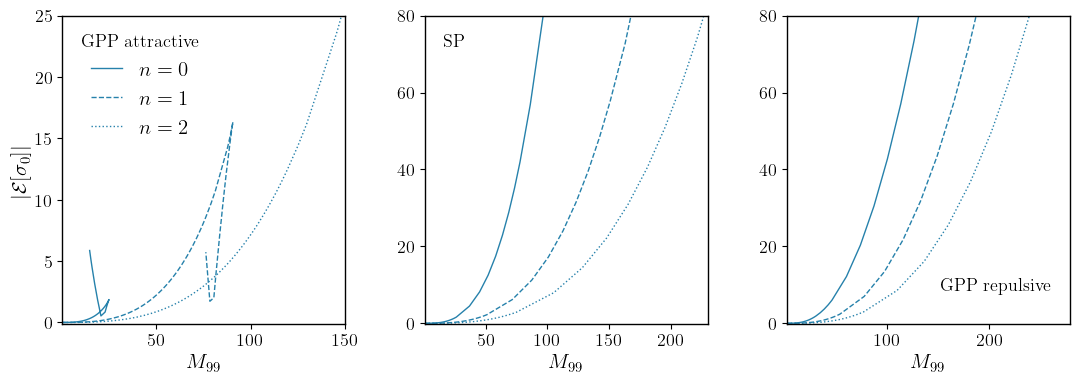

In [7]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

fac = 4*np.pi
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

### Lambda = -1
temp = np.concatenate((Sig0R99M99EnergyM1n0[:-1, 2], Sig0R99M99EnergyM1Cn0[1:, 2]))
ax[0].plot(fac*temp, np.abs(LM1dataEnfM1n0[:, 1]), ls='-', lw=1, 
           color=col[2], label=r'$n=0$')  # n=0, Lambda=-1

temp = np.concatenate([Sig0R99M99EnergyM1n1[:-2, 2], Sig0R99M99EnergyM12n1[:, 2]])
ax[0].plot(fac*temp, np.abs(LM1dataEnfM1n1[:, 1]), ls='--', lw=1, 
           color=col[2], label=r'$n=1$')

ax[0].plot(fac*Sig0R99M99EnergyM2n2[:, 2], np.abs(LM1dataEnfM1n2[:, 1]), ls=':', lw=1, 
           color=col[2], label=r'$n=2$')

### Lambda = 0
temp = np.concatenate((Sig0R99M99Energyn0[:, 2], Sig0R99M99EnergyCn0[1:, 2]))
ax[1].plot(fac*temp, np.abs(L0dataEnfM1n0[:, 1]), ls='-', lw=1, 
           color=col[2]) # , label=r'$n=0$'

ax[1].plot(fac*Sig0R99M99Energyn1[:, 2], np.abs(L0dataEnfM1n1[:, 1]), ls='--', lw=1, 
           color=col[2]) # , label=r'$n=1$'

ax[1].plot(fac*Sig0R99M99Energy2n2[:, 2], np.abs(L0dataEnfM1n2[:, 1]), ls=':', lw=1, 
           color=col[2]) # , label=r'$n=2$'

ax[1].plot([], [], ls=' ', label=r'')


### Lambda = 1
ax[2].plot(fac*Sig0R99M99EnergyP1n0[:, 2], np.abs(LP1dataEnfM1n0[:, 1]), ls='-', lw=1, 
           color=col[2])  # , label=r'$n=0$'

ax[2].plot(fac*Sig0R99M99EnergyP1n1[:, 2], np.abs(LP1dataEnfM1n1[:, 1]), ls='--', lw=1, 
           color=col[2])  # , label=r'$n=1$'

ax[2].plot(fac*Sig0R99M99EnergyP2n2[:-2, 2], np.abs(LP1dataEnfM1n2[:-2, 1]), ls=':', lw=1, 
           color=col[2])  # , label=r'$n=2$'

ax[2].plot([], [], ls=' ', label=r'')

#####
ax[0].set_ylabel(r'$|\mathcal{E}[\sigma_0]|$')
ax[0].set_xlabel(r'$M_{99}$')
ax[1].set_xlabel(r'$M_{99}$')
ax[2].set_xlabel(r'$M_{99}$')

#ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[0].set_xlim(0.5, 150)
ax[0].set_ylim(-0.1, 25)

ax[1].set_xlim(0.5, 230)
ax[1].set_ylim(-0.1, 80)

ax[2].set_xlim(0.5, 280)
ax[2].set_ylim(-0.1, 80)

ax[0].legend(frameon=False, title=r'GPP attractive')
ax[1].legend(frameon=False, title=r'SP')
ax[2].legend(frameon=False, title=r'GPP repulsive')

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_12656/2797901224.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


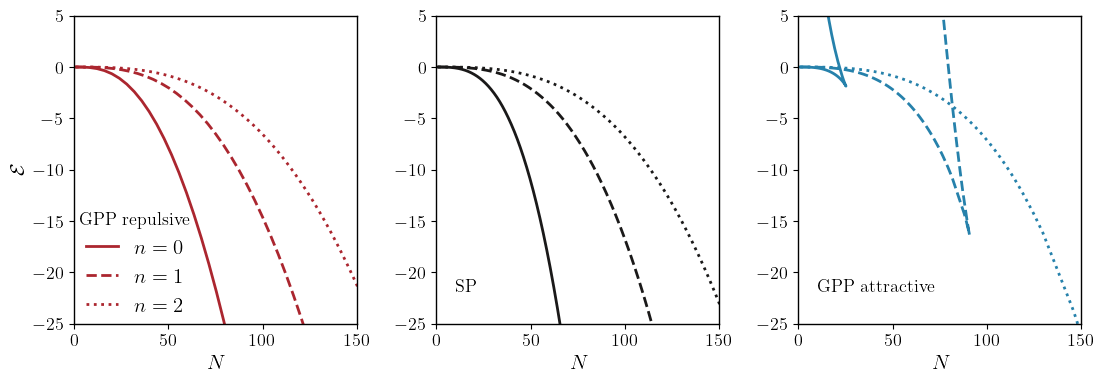

In [8]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

fac = 4*np.pi
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

### Lambda = 1
#temp = np.concatenate((Sig0R99M99EnergyP1n0[:, 2], Sig0R99M99EnergyP1Cn0[:, 2]))
ftemp = interp1d(fac*Sig0R99M99EnergyP1n0[:, 2], LP1dataEnfM1n0[:, 1], kind='quadratic')
rtemp = np.linspace(fac*Sig0R99M99EnergyP1n0[0, 2], fac*Sig0R99M99EnergyP1n0[-1, 2], 1000)
ax[0].plot(rtemp, ftemp(rtemp), ls='-', color=col[3], label=r'$n=0$')
#ax[0].plot(fac*Sig0R99M99EnergyP1n0[:, 2], LP1dataEnfM1n0[:, 1], ls='-', #lw=1, 
#           color=col[3], label=r'$n=0$')

ftemp = interp1d(fac*Sig0R99M99EnergyP1n1[:80, 2], LP1dataEnfM1n1[:80, 1], kind='quadratic')
rtemp = np.linspace(fac*Sig0R99M99EnergyP1n1[0, 2], fac*Sig0R99M99EnergyP1n1[79, 2], 1000)
ax[0].plot(rtemp, ftemp(rtemp), ls='--', color=col[3], label=r'$n=1$')
#ax[0].plot(fac*Sig0R99M99EnergyP1n1[:, 2], LP1dataEnfM1n1[:, 1], ls='--', color=col[3], label=r'$n=1$')

ftemp = interp1d(fac*Sig0R99M99EnergyP2n2[:, 2], LP1dataEnfM1n2[:, 1], kind='quadratic')
rtemp = np.linspace(fac*Sig0R99M99EnergyP2n2[0, 2], fac*Sig0R99M99EnergyP2n2[-1, 2], 1000)
ax[0].plot(rtemp, ftemp(rtemp), ls=':', color=col[3], label=r'$n=2$')
#ax[0].plot(fac*Sig0R99M99EnergyP2n2[:-2, 2], LP1dataEnfM1n2[:-2, 1], ls=':', color=col[3], label=r'$n=2$')

### Lambda = 0
temp = np.concatenate((Sig0R99M99Energyn0[:, 2], Sig0R99M99EnergyCn0[1:, 2]))
ftemp = interp1d(fac*temp, L0dataEnfM1n0[:, 1], kind='quadratic')
rtemp = np.linspace(fac*temp[0], fac*temp[-1], 1000)
ax[1].plot(rtemp, ftemp(rtemp), ls='-', color=col[0]) # , label=r'$n=0$'
#ax[1].plot(fac*temp, L0dataEnfM1n0[:, 1], ls='-', #lw=1, 
#           color=col[0]) # , label=r'$n=0$'

ftemp = interp1d(fac*Sig0R99M99Energyn1[:, 2], L0dataEnfM1n1[:, 1], kind='quadratic')
rtemp = np.linspace(fac*Sig0R99M99Energyn1[0, 2], fac*Sig0R99M99Energyn1[-1, 2], 1000)
ax[1].plot(rtemp, ftemp(rtemp), ls='--', color=col[0])
#ax[1].plot(fac*Sig0R99M99Energyn1[:, 2], L0dataEnfM1n1[:, 1], ls='--', #lw=1, 
#           color=col[0]) # , label=r'$n=1$'

ftemp = interp1d(fac*Sig0R99M99Energy2n2[:, 2], L0dataEnfM1n2[:, 1], kind='quadratic')
rtemp = np.linspace(fac*Sig0R99M99Energy2n2[0, 2], fac*Sig0R99M99Energy2n2[-1, 2], 1000)
ax[1].plot(rtemp, ftemp(rtemp), ls=':', color=col[0])
#ax[1].plot(fac*Sig0R99M99Energy2n2[:, 2], L0dataEnfM1n2[:, 1], ls=':', #lw=1, 
#           color=col[0]) # , label=r'$n=2$'

ax[1].plot([], [], ls=' ', label=r'')

### Lambda = -1
temp = np.concatenate((Sig0R99M99EnergyM1n0[:-1, 2], Sig0R99M99EnergyM1Cn0[1:, 2]))
ax[2].plot(fac*temp, LM1dataEnfM1n0[:, 1], ls='-', #lw=1, 
           color=col[2])#, label=r'$n=0$')  # n=0, Lambda=-1

temp = np.concatenate([Sig0R99M99EnergyM1n1[:-2, 2], Sig0R99M99EnergyM12n1[:, 2]])
ax[2].plot(fac*temp, LM1dataEnfM1n1[:, 1], ls='--', #lw=1, 
           color=col[2])#, label=r'$n=1$')

ax[2].plot(fac*Sig0R99M99EnergyM2n2[:, 2], LM1dataEnfM1n2[:, 1], ls=':', #lw=1, 
           color=col[2])#, label=r'$n=2$')

ax[2].plot([], [], ls=' ', label=r'')
#####
ax[0].set_ylabel(r'$\mathcal{E}$')
ax[0].set_xlabel(r'$N$')
ax[1].set_xlabel(r'$N$')
ax[2].set_xlabel(r'$N$')

#ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[0].set_xlim(0, 150)
ax[0].set_ylim(-25, 5)

ax[1].set_xlim(0, 150)
ax[1].set_ylim(-25, 5)

ax[2].set_xlim(0, 150)
ax[2].set_ylim(-25, 5)

ax[0].legend(loc=(-0.01, 0), frameon=False, title=r'GPP repulsive')
ax[1].legend(loc='lower left', frameon=False, title=r'SP')
ax[2].legend(loc='lower left', frameon=False, title=r'GPP attractive')

In [9]:
fig.savefig('Ener_Npart.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_62381/2706847549.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.5117311258028474 2.080748598115769
0.9770664302799328


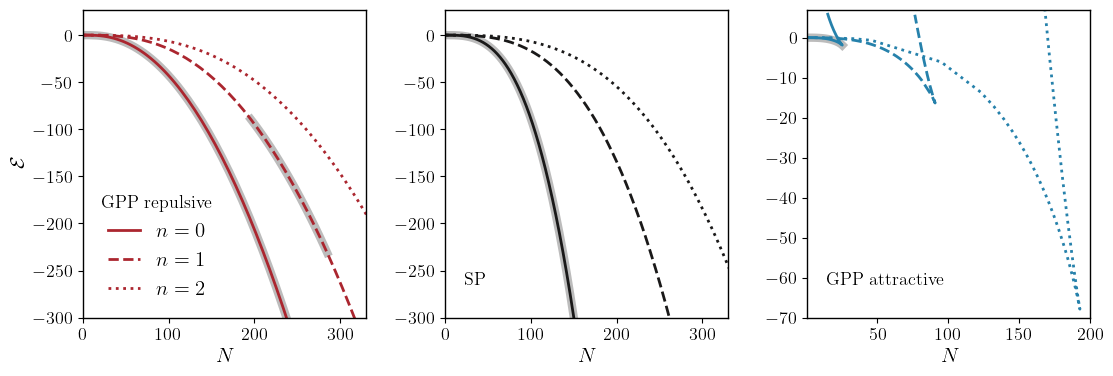

In [11]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

fac = 4*np.pi
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

### Lambda = 1
ftemp = interp1d(fac*Sig0R99M99EnergyP1n0[:, 2], LP1dataEnfM1n0[:, 1], kind='quadratic')
rtemp = np.linspace(fac*Sig0R99M99EnergyP1n0[0, 2], fac*Sig0R99M99EnergyP1n0[-1, 2], 1000)
ax[0].plot(rtemp, ftemp(rtemp), ls='-', lw=6, color='#242222', alpha=0.3)  # banda de estabilidad
ax[0].plot(rtemp, ftemp(rtemp), ls='-', color=col[3], label=r'$n=0$')
#ax[0].plot(fac*Sig0R99M99EnergyP1n0[:, 2], LP1dataEnfM1n0[:, 1], ls='-', #lw=1, 
#           color=col[3], label=r'$n=0$')

ftemp = interp1d(fac*Sig0R99M99EnergyP1n1[:80, 2], LP1dataEnfM1n1[:80, 1], kind='quadratic')
rtemp = np.linspace(fac*Sig0R99M99EnergyP1n1[0, 2], fac*Sig0R99M99EnergyP1n1[79, 2], 1000)
temp = Sig0R99M99EnergyP1n1[:, 0]
valInf, indiceInf = ru.find_nearest(temp, 1.55)  # 1.55 ≲ σ0 ≲ 2.07,
valSup, indiceSup = ru.find_nearest(temp, 2.07)
print(valInf, valSup)
rtemp2 = np.linspace(fac*Sig0R99M99EnergyP1n1[indiceInf, 2], fac*Sig0R99M99EnergyP1n1[indiceSup, 2], 100)
ax[0].plot(rtemp2, ftemp(rtemp2), ls='-', lw=6, color='#242222', alpha=0.3)  # banda de estabilidad
ax[0].plot(rtemp, ftemp(rtemp), ls='--', color=col[3], label=r'$n=1$')
#ax[0].plot(fac*Sig0R99M99EnergyP1n1[:, 2], LP1dataEnfM1n1[:, 1], ls='--', color=col[3], label=r'$n=1$')

ftemp = interp1d(fac*Sig0R99M99EnergyP2n2[:, 2], LP1dataEnfM1n2[:, 1], kind='quadratic')
rtemp = np.linspace(fac*Sig0R99M99EnergyP2n2[0, 2], fac*Sig0R99M99EnergyP2n2[-1, 2], 1000)
ax[0].plot(rtemp, ftemp(rtemp), ls=':', color=col[3], label=r'$n=2$')
#ax[0].plot(fac*Sig0R99M99EnergyP2n2[:-2, 2], LP1dataEnfM1n2[:-2, 1], 'o', color=col[3], label=r'$n=2$')

### Lambda = 0
#temp = np.concatenate((Sig0R99M99Energyn0[:, 2], Sig0R99M99EnergyCn0[1:, 2]))
#ftemp = interp1d(fac*temp, L0dataEnfM1n0[:, 1], kind='quadratic')
ftemp = interp1d(fac*Sig0R99M99Energyn0[:, 2], L0dataEnfM1n0[:, 1], kind='quadratic')
#rtemp = np.linspace(fac*temp[0], fac*temp[-1], 1000)
rtemp = np.linspace(fac*Sig0R99M99Energyn0[0, 2], fac*Sig0R99M99Energyn0[-1, 2], 1000)
ax[1].plot(rtemp, ftemp(rtemp), ls='-', lw=6, color='#242222', alpha=0.3)  # banda de estabilidad
ax[1].plot(rtemp, ftemp(rtemp), ls='-', color=col[0]) # , label=r'$n=0$'
#ax[1].plot(fac*temp, L0dataEnfM1n0[:, 1], ls='-', #lw=1, 
#           color=col[0]) # , label=r'$n=0$'

ftemp = interp1d(fac*Sig0R99M99Energyn1[:, 2], L0dataEnfM1n1[:, 1], kind='quadratic')
rtemp = np.linspace(fac*Sig0R99M99Energyn1[0, 2], fac*Sig0R99M99Energyn1[-1, 2], 1000)
ax[1].plot(rtemp, ftemp(rtemp), ls='--', color=col[0])
#ax[1].plot(fac*Sig0R99M99Energyn1[:, 2], L0dataEnfM1n1[:, 1], ls='--', #lw=1, 
#           color=col[0]) # , label=r'$n=1$'

ftemp = interp1d(fac*Sig0R99M99Energy2n2[:, 2], L0dataEnfM1n2[:, 1], kind='quadratic')
rtemp = np.linspace(fac*Sig0R99M99Energy2n2[0, 2], fac*Sig0R99M99Energy2n2[-1, 2], 1000)
ax[1].plot(rtemp, ftemp(rtemp), ls=':', color=col[0])
#ax[1].plot(fac*Sig0R99M99Energy2n2[:, 2], L0dataEnfM1n2[:, 1], ls=':', #lw=1, 
#           color=col[0]) # , label=r'$n=2$'

ax[1].plot([], [], ls=' ', label=r'')

### Lambda = -1
temp = np.concatenate((Sig0R99M99EnergyM1n0[:-1, 2], Sig0R99M99EnergyM1Cn0[1:, 2]))
temp2 = np.concatenate((Sig0R99M99EnergyM1n0[:-1, 0], Sig0R99M99EnergyM1Cn0[1:, 0]))
valSup, indiceSup = ru.find_nearest(temp2, 1.0)  # σ0 ≲ 1.0,
print(valSup)
ax[2].plot(fac*temp[:indiceSup+1], LM1dataEnfM1n0[:indiceSup+1, 1], ls='-', lw=6, color='#242222', alpha=0.3)  # banda de estabilidad
ax[2].plot(fac*temp, LM1dataEnfM1n0[:, 1], ls='-', #lw=1, 
           color=col[2])#, label=r'$n=0$')  # n=0, Lambda=-1

temp = np.concatenate([Sig0R99M99EnergyM1n1[:-2, 2], Sig0R99M99EnergyM12n1[:, 2]])
ax[2].plot(fac*temp, LM1dataEnfM1n1[:, 1], ls='--', #lw=1, 
           color=col[2])#, label=r'$n=1$')

ftemp = interp1d(fac*Sig0R99M99EnergyM2n2[:-19, 2], LM1dataEnfM1n2[:-19, 1], kind='quadratic')
rtemp = np.linspace(fac*Sig0R99M99EnergyM2n2[0, 2], fac*Sig0R99M99EnergyM2n2[-19, 2], 1000)
#ax[2].plot(rtemp, ftemp(rtemp), ls=':', color=col[2])
ax[2].plot(fac*Sig0R99M99EnergyM2n2[:, 2], LM1dataEnfM1n2[:, 1], ls=':', #lw=1, 
           color=col[2])#, label=r'$n=2$')

ax[2].plot([], [], ls=' ', label=r'')
#####
ax[0].set_ylabel(r'$\mathcal{E}$')
ax[0].set_xlabel(r'$N$')
ax[1].set_xlabel(r'$N$')
ax[2].set_xlabel(r'$N$')

#ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[0].set_xlim(0, 330)
ax[0].set_ylim(-300, 27)

ax[1].set_xlim(0, 330)  # 0, 150
ax[1].set_ylim(-300, 27)  # -25, 5

#ax[2].set_xlim(0, 150)
#ax[2].set_ylim(-25, 5)

ax[2].set_xlim(5e-1, 200)
ax[2].set_ylim(-70, 7)
#ax[2].set_xscale('log')

ax[0].legend(loc='best', frameon=False, title=r'GPP repulsive')
ax[1].legend(loc='lower left', frameon=False, title=r'SP')
ax[2].legend(loc='lower left', frameon=False, title=r'GPP attractive')

In [12]:
fig.savefig('22Ener_Npart.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [47]:
fac*Sig0R99M99EnergyM2n2[-15, 2], fac*Sig0R99M99EnergyM2n2[:-19, 2]

(188.01210385636577,
 array([  0.46953555,   1.04980246,   1.48470855,   3.320016  ,
          4.69498042,  10.48761604,  14.81877854,  32.85421435,
         45.96963305,  94.9758084 , 122.94636823, 132.02712564,
        139.28607186, 145.1581124 , 150.11807256, 154.26622722,
        157.82197961, 160.95032509, 163.66731533, 166.09596444,
        168.25171961, 170.25924291, 172.00870589, 173.40993309,
        173.63046371, 175.12940774, 175.42282645, 176.48592789,
        177.30536636, 177.76723595, 178.90689397, 180.02176416,
        181.04582246, 182.01827845, 182.87907197, 183.72831999,
        184.4921172 , 185.21654445, 185.88518657, 186.48701947,
        187.09019544, 187.69602006, 188.15639614, 188.44044221,
        188.62056182, 189.114803  , 189.46858522, 189.51156574,
        189.92398069, 190.20861393, 190.56332989, 190.89347517,
        191.12829439, 191.413454  , 191.58076955, 191.78957477,
        191.95838607, 192.14563147, 192.28565474, 192.39203765,
        192.4869798

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_19473/2787604545.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(fac*Sig0R99M99EnergyM2n2[:-19, 2], LM1dataEnfM1n2[:-19, 1], 'o')


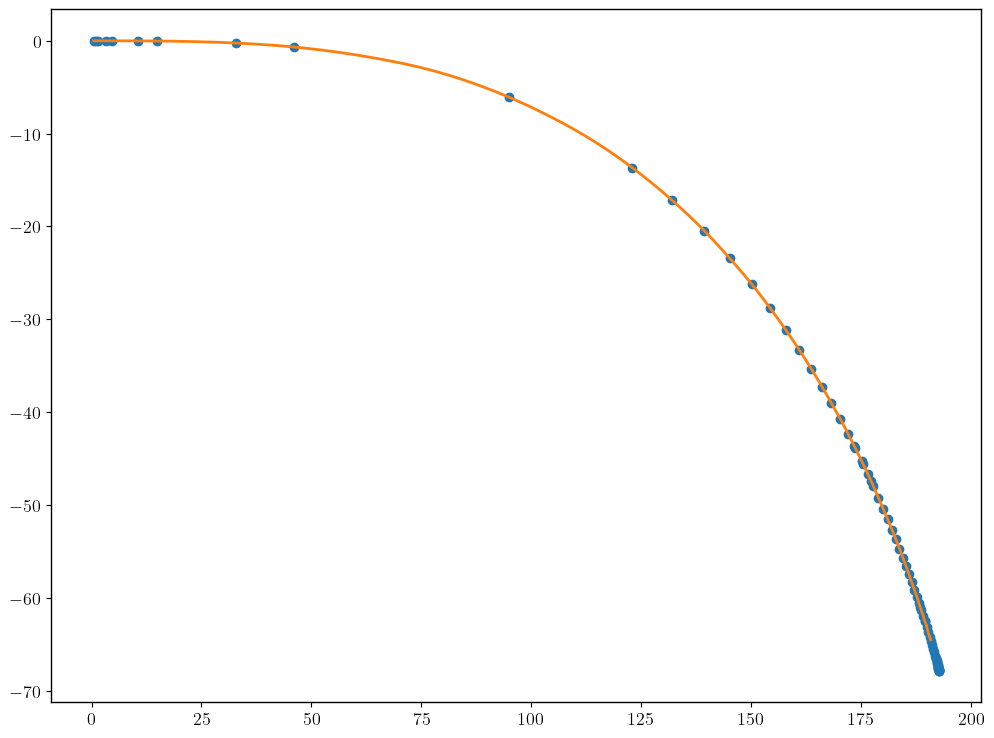

In [45]:
plt.plot(fac*Sig0R99M99EnergyM2n2[:-19, 2], LM1dataEnfM1n2[:-19, 1], 'o')

ftemp = interp1d(fac*Sig0R99M99EnergyM2n2[:-19, 2], LM1dataEnfM1n2[:-19, 1], kind='quadratic')
rtemp = np.linspace(fac*Sig0R99M99EnergyM2n2[0, 2], fac*Sig0R99M99EnergyM2n2[-18, 2], 1000)

plt.plot(rtemp, ftemp(rtemp), '-')